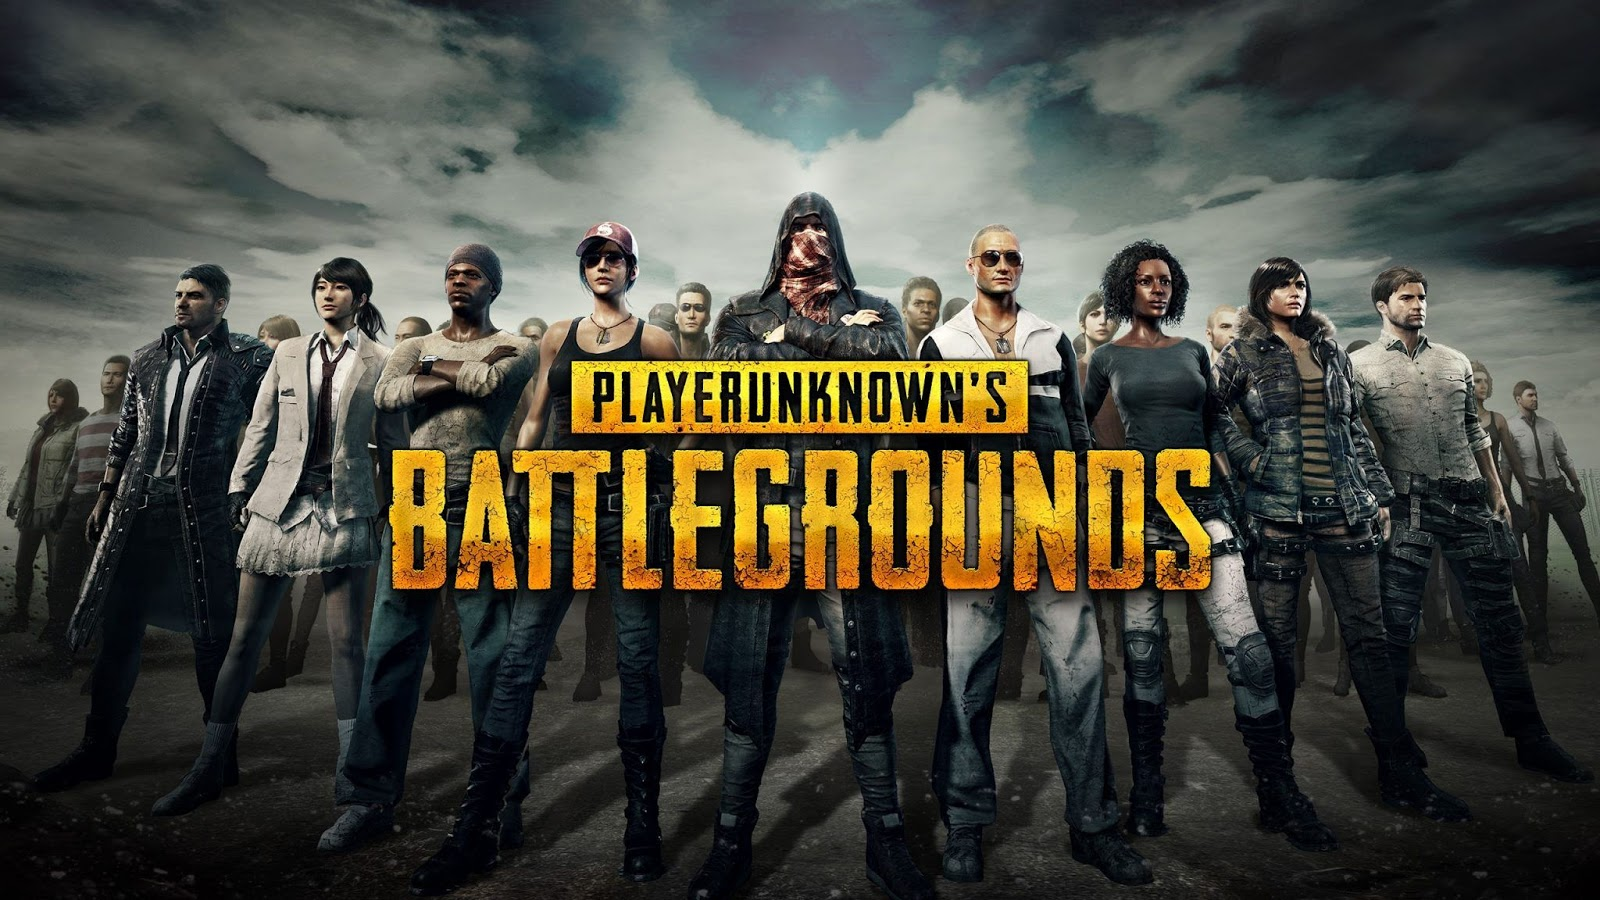

#                 #innominions #hackathon

#                      PUBG EDA Task


# .......Importing required liabraries......

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .......Reading the dataset.......

In [44]:
df = pd.read_csv('data.csv')

In [45]:
#finding shape of data
df.shape

(1111742, 30)

In [53]:
df.head(10)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,3651102,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,...,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
8,2363197,342437cd2b5680,7acbacbed1b711,99cbf12f555f61,0,2,338.70,2,0,15,...,1,3349.0,0,0.0,0,0,1846.00,5,0,0.7174
9,271498,3cf3cc81325a37,537c4bd393dcff,38a8b94623d77d,2,1,230.80,2,0,1,...,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387


# ........Basic information about dataset.......


In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


# .......Data Fields......

DBNOs - Number of enemy players knocked.   

assists - Number of enemy players this player damaged that were killed by teammates.  

boosts - Number of boost items used
.              
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.    
headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.     

Id - Player’s Id     

killPlace - Ranking  in match of number of enemy players killed.  

killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
          
killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.  

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify matches. There are no matches that are in both the training and testing set.

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.



# .......Data info.....

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

# Number of players with percentile greater or equal to 90% 

In [57]:
print("#  players in top 10 places: ", sum(df['winPlacePerc'] >= 0.9))

#  players in top 10 places:  116996


# Number of players with percentile less than or equal to 10%

In [58]:
print("#  players in last 10 places: ", sum(df['winPlacePerc'] <= 0.1))

#  players in last 10 places:  156680


In [59]:
main_df_subset =  df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'heals', 'kills', 'revives', 
                           'rideDistance', 'walkDistance', 'swimDistance', 'matchDuration', 'weaponsAcquired',
                                               'winPlacePerc']]

# ........Correlation Map (heatmap).......

Let's plot correlation map for some of the features we are more interested in.

This will give initial idea about each feature's correlation with win percentile

<AxesSubplot:>

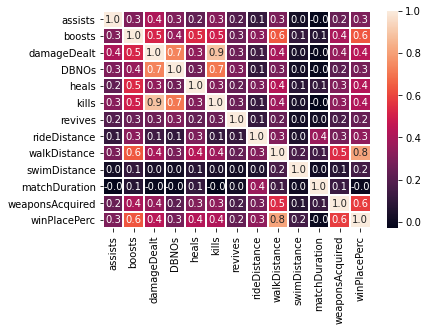

In [9]:
corr = main_df_subset.corr()

sns.heatmap(corr, fmt='.1f', annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidth=1)

# ..........Data Cleaning......

Let's filter out pairs with correlation >= 0.4

This will give us the pairs of correlated features to analyse further

In [60]:
result = corr.unstack().sort_values(ascending=False).drop_duplicates()

print("Pairs with correlation >= 0.4:")
result[result >= 0.4]

Pairs with correlation >= 0.4:


winPlacePerc     winPlacePerc       1.000000
kills            damageDealt        0.889038
walkDistance     winPlacePerc       0.810817
damageDealt      DBNOs              0.735084
DBNOs            kills              0.706211
walkDistance     boosts             0.639361
boosts           winPlacePerc       0.633482
weaponsAcquired  winPlacePerc       0.582505
walkDistance     weaponsAcquired    0.539765
boosts           heals              0.535388
damageDealt      boosts             0.519600
boosts           kills              0.499478
damageDealt      winPlacePerc       0.438973
heals            walkDistance       0.429283
                 winPlacePerc       0.427296
winPlacePerc     kills              0.418527
damageDealt      assists            0.409369
weaponsAcquired  boosts             0.405301
dtype: float64

#  ...... explore each feature pair one by one to understand their impact on winPercentile.....

#  Should I walk more or drive more(use vehicle to move around)?

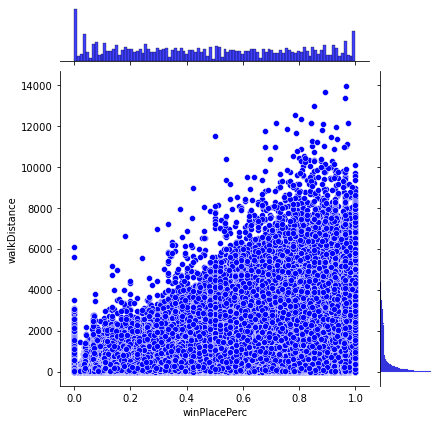

In [11]:
# Jointplot of walkdistance vs winplace percentile 
sns.jointplot(x='winPlacePerc', y='walkDistance', data=main_df_subset, color='blue')

Conclusion-

As we can notice from above two plots that, for high win percentile (0.8-1.0), walk distance is highly correlated with winPlacePerc and ride distance has less correlation with winPlacePerc.

Hence, It is advisable to walk more than ride to increase your chances of victory!!!!

# If I want to cross a river, should I swim or use boat ?

<AxesSubplot:xlabel='winPlacePerc', ylabel='swimDistance'>

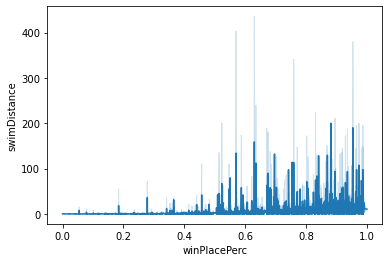

In [12]:
# Lineplot of swimdistance vs winplace percentile 
sns.lineplot(x='winPlacePerc', y='swimDistance', data=main_df_subset)

Conclusion-

Above plot implies that the players who comes in top 20 percentile(0.8-1.0) prefer to swim than use boat to cross a river.

I also agree with this outcome.

When you swim, it will be difficult for an enemy to spot you in river. If you use boat then you will be spotted right away because of boat's noise.


So, better to swim to cross a river than using a boat!!!!

# More kills imply higher chance of winning? 

In [62]:
result = main_df_subset[main_df_subset.winPlacePerc >= 0.9]
print("Average  of kills by players who came in top10 percentile: ", round(np.mean(result.kills)))

Average  of kills by players who came in top10 percentile:  3


If you want to increase your chance of coming in top 10 places, get atleast 3 kills...

<ipython-input-14-c3578c6512d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_subset['kills_bin'] = pd.cut(main_df_subset['kills'], [-1, 0, 3, 5, 7, 10, 15, 100],


<AxesSubplot:xlabel='kills_bin', ylabel='winPlacePerc'>

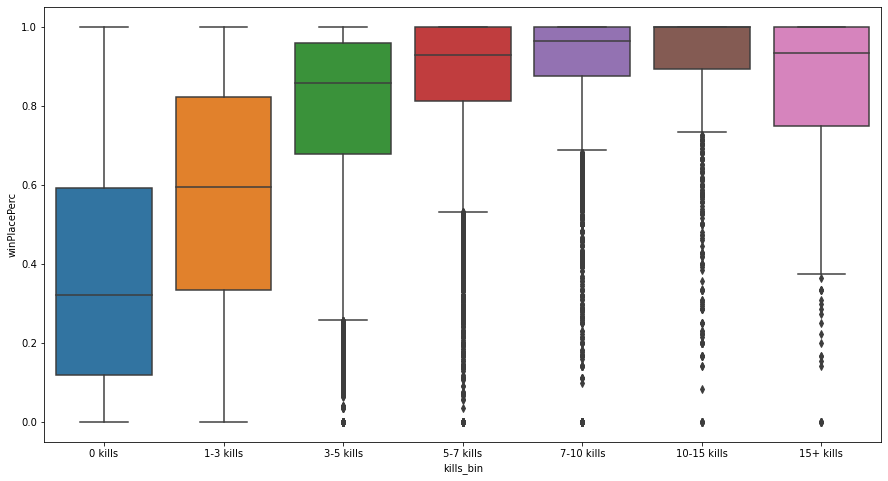

In [14]:
# Dividing kills into 7 different bins for better representation
main_df_subset['kills_bin'] = pd.cut(main_df_subset['kills'], [-1, 0, 3, 5, 7, 10, 15, 100], 
                                            labels=['0 kills','1-3 kills', '3-5 kills', '5-7 kills',
                                                    '7-10 kills', '10-15 kills', '15+ kills'])

# Boxplot of winPlacePerc vs kills
plt.figure(figsize=(15,8))
sns.boxplot(x='kills_bin', y='winPlacePerc', data=main_df_subset)

This boxplot implies that,

     Indeed, the more kills you get, the higher the chance of winning!!!!

# Do boosts help to win the game?

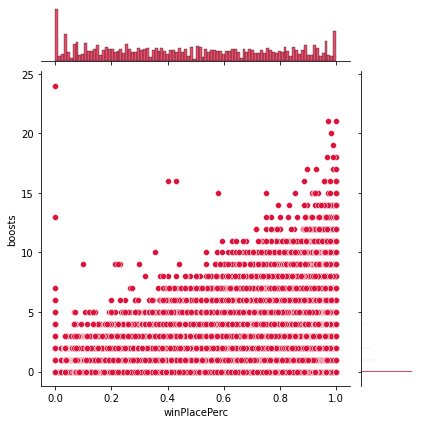

In [15]:
# Boosts vs winPlacePerc
sns.jointplot(x='winPlacePerc', y='boosts', data=main_df_subset, color='crimson')

This plot clearly shows that boosts have been super important part of players victory.

 So, Let's explore 'boosts' feature a little more!!!!

In [63]:
print("Average of boosts used by players in top10 percentile: ", round(np.mean(result.boosts)))

Average of boosts used by players in top10 percentile:  4


<AxesSubplot:xlabel='kills_bin', ylabel='boosts'>

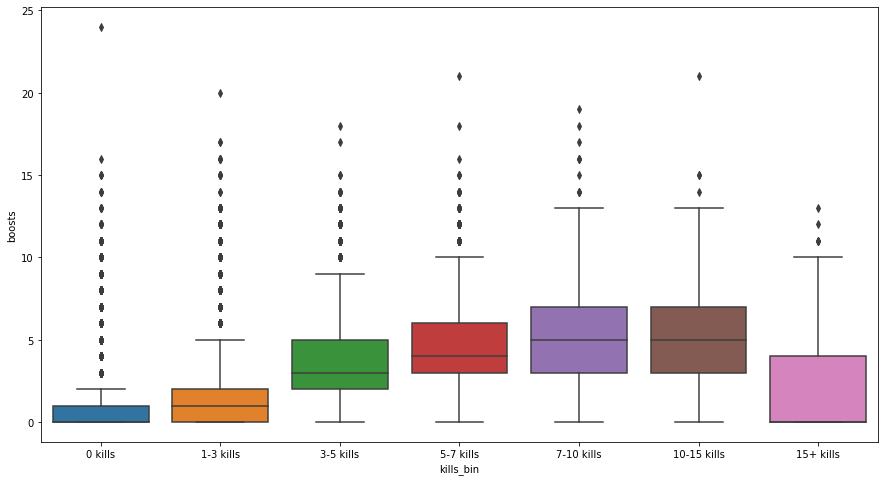

In [17]:
# Boosts vs kills
plt.figure(figsize=(15,8))
sns.boxplot(x='kills_bin', y='boosts', data=main_df_subset)

Earlier we saw that, more kills can help you secure place in top10 percentile. Above plot depicts that more boosts can really help you in securing more kills. 

Boost helps player to gain higher agility and movement speed, which in turn might help in getting more kills

# Is that true that if you acquire more weapons during the game, your chances of winning will be higher?

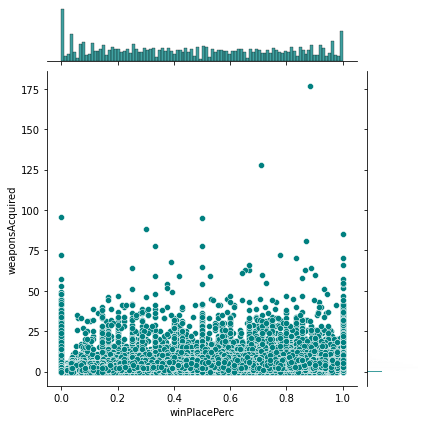

In [18]:
# weapons acquired vs win place percetile 
sns.jointplot(x='winPlacePerc', y='weaponsAcquired', data=main_df_subset, color='teal')

Though we got relatively high correlation(0.58) between, weaponsAcquired and win percentile, above plot shows that it doesn't seem to be the case. Hence, a player can use only 3-4 different weapons with refill and still win.

# "Heals(Health packs) can be game changer!"...Lets conclude using graph.

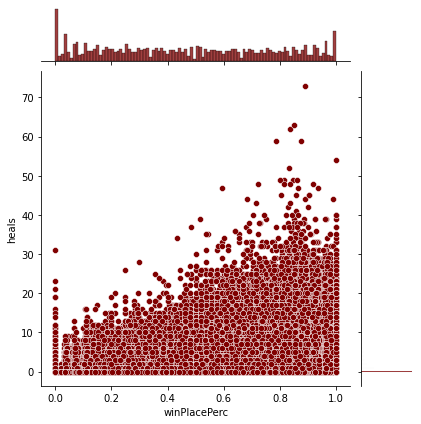

In [19]:
# heals vs win place percetile 
sns.jointplot(x='winPlacePerc', y='heals', data=main_df_subset, color='maroon')

As players fight till the end, they need more heals. Other players will try to kill you and you need to be alive to win the game. Also, if you are left outside of zone, it will continuously decrease your health. Heal is the only option to get your health back. So, it seems obvious observation that the more heals, the better the chances of your vicotry!

# .......Something Interesting is here......


Maximum Values From Each Fields.

In [64]:
# 1) Max DBNOs
print("Sir knocks a lot! - Max DBNOs:", max(df.DBNOs))

Sir knocks a lot! - Max DBNOs: 35


In [65]:
# 2) Max assists in single match
print("Best assistant! - Max assists in a match:", max(df.assists))


Best assistant! - Max assists in a match: 17


In [66]:
# 3) Max number of Boosts
print("On a pill! - Max number of boosts:", max(df.boosts))


On a pill! - Max number of boosts: 24


In [67]:
# 4) Max damage dealt
print("The berserker! - Max damage dealt:", max(df.damageDealt))


The berserker! - Max damage dealt: 5990.0


In [68]:
# 5) Max headshot kills
print("The Sniper! - Max number of headshot kills:", max(df.headshotKills))


The Sniper! - Max number of headshot kills: 64


In [69]:
# 6) Max heals
print("The doctor! - Max number of health packs used in a match:", max(df.heals))


The doctor! - Max number of health packs used in a match: 73


In [70]:
# 7) Max kills
print("The killing machine! - Max number of kills in a match:", max(df.kills))


The killing machine! - Max number of kills in a match: 72


In [71]:
# 8) Max match duration
print("Camper! - Longest match ever: %f mins"%(max(df.matchDuration)/60))


Camper! - Longest match ever: 37.283333 mins


In [72]:
# 9) Most revives
print("Best Support! - Most number of revives:", max(df.revives))


Best Support! - Most number of revives: 23


In [73]:
# 10) Max ride distance
print("The F1 Champ! - Max ride distance:", max(df.rideDistance), "m")

The F1 Champ! - Max ride distance: 35400.0 m


In [74]:
# 11) Max road kills
print("The transformer! - Most kills by a vehicle:", max(df.roadKills))


The transformer! - Most kills by a vehicle: 14


In [76]:
# 12) Max swim distance
print("The olympic champ! - Max swim distance:", max(df.swimDistance), "m")


The olympic champ! - Max swim distance: 2668.0 m


In [75]:
# 13) Most team kills
print("The betrayer! - # of times killed a teammate:", max(df.teamKills))


The betrayer! - # of times killed a teammate: 10


In [77]:
# 14) Max vehicle destroyed
print("Vehicle Destroyer! - Max vehicles destroyed:", max(df.vehicleDestroys))

Vehicle Destroyer! - Max vehicles destroyed: 5


In [78]:
# 15) Max walking distance
print("The marathon champ! - Max walk distance:", max(df.walkDistance), "m")

The marathon champ! - Max walk distance: 13960.0 m


In [79]:
# 16) Max weapons acquired
print("The collector! - Max number of weapons acquired:", max(df.weaponsAcquired))

The collector! - Max number of weapons acquired: 177
